# Install Package

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the dataset

In [3]:
data = pd.read_csv('CensusCanada2021Training.csv')

In [4]:
data.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


In [5]:
data = data.rename(columns={'Total Households For Period Of Construction Built Between 1981 And 190': 'Total Households For Period Of Construction Built Between 1981 And 1990'})

# Deriving additional columns

Calculate percentage for each tenure type

CT with high percentage of renters need affordable housing development and renter subsidy

In [6]:
data['Pct_Owner'] = (data['Dwellings by Tenure Owner'] / data['Total Households for Tenure']) * 100
data['Pct_Renter'] = (data['Dwellings by Tenure Renter'] / data['Total Households for Tenure']) * 100
data['Ratio_of_Renters_to_Owner'] = (data['Pct_Renter'] / data['Pct_Owner'])

CT with high percentage of "Before 1961 construction" need affordable housing development

CT with high percentage of "2011-2021 construction" might not need affordable housing development

In [7]:
data['Pct_Older_House'] = ((data['Total Households For Period Of Construction Built Before 1961']+
                            data['Total Households For Period Of Construction Built Between 1961 And 1980'])
                           / data['Total Households For Period Of Construction']) * 100

data['Pct_New_House'] = ((data['Total Households For Period Of Construction Built Between 2006 And 2010']+
                          data['Total Households For Period Of Construction Built Between 2011 And 2015']+
                          data['Total Households For Period Of Construction Built Between 2016 And 2021']
                          ) / data['Total Households For Period Of Construction']) * 100

data['Ratio_of_Olderhouse_to_Newhouse'] = (data['Pct_Older_House'] / data['Pct_New_House'])

High percentage of house might have high household income and not need for affordable housing

In [8]:
data['Total Household for Structure Type'] = (data['Total Households For Structure Type Houses']+data['Total Households For Structure Type Apartment, Building Low And High Rise']+data['Total Households For Structure Type Other Dwelling Types'])

data['Pct_Structure_Houses'] = (data['Total Households For Structure Type Houses']/data['Total Household for Structure Type'])

data['Pct_Structure_Apartment'] = (data['Total Households For Structure Type Apartment, Building Low And High Rise']/data['Total Household for Structure Type'])

Household size

In [9]:
data['Household_Size'] = data['Total Population'] / data['Total Households']

In [10]:
data['Ratio_of_Renters_to_Owner'] = data['Ratio_of_Renters_to_Owner'].replace([np.inf, -np.inf], np.nan)
data['Ratio_of_Olderhouse_to_Newhouse'] = data['Ratio_of_Olderhouse_to_Newhouse'].replace([np.inf, -np.inf], np.nan)

data['Ratio_of_Renters_to_Owner'].fillna(data['Ratio_of_Renters_to_Owner'].mean())
data['Ratio_of_Olderhouse_to_Newhouse'].fillna(data['Ratio_of_Olderhouse_to_Newhouse'].mean())

data['Ratio_of_Renters_to_Owner'] = data['Ratio_of_Renters_to_Owner'].round(5)
data['Ratio_of_Olderhouse_to_Newhouse'] = data['Ratio_of_Olderhouse_to_Newhouse'].round(5)

In [11]:
data.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 1990,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,...,Pct_Owner,Pct_Renter,Ratio_of_Renters_to_Owner,Pct_Older_House,Pct_New_House,Ratio_of_Olderhouse_to_Newhouse,Total Household for Structure Type,Pct_Structure_Houses,Pct_Structure_Apartment,Household_Size
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,...,85.425101,14.574899,0.17062,93.522267,0.809717,115.50000,1265,0.897233,0.102767,2.500405
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,...,81.981982,18.018018,0.21978,0.000000,97.597598,0.00000,1665,0.963964,0.030030,3.536937
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,...,85.045045,15.135135,0.17797,9.189189,18.918919,0.48571,2775,0.855856,0.144144,2.915315
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,...,77.464789,22.535211,0.29091,73.802817,5.070423,14.55556,1775,0.712676,0.154930,2.295211
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,...,90.252708,10.108303,0.11200,14.440433,0.722022,20.00000,1385,0.747292,0.234657,2.629603


# Summarize variables: Description, Inclusion, and Reason

In [12]:
Selected_Variables = [
    'Total Population',
    'Total Households',
    'Median Household Income (Current Year $)',
    'Dwellings by Tenure Owner',
    'Dwellings by Tenure Renter',
    'Total Households For Period Of Construction Built Before 1961',
    'Total Households For Period Of Construction Built Between 1961 And 1980',
    'Total Households For Period Of Construction Built Between 2011 And 2015',
    'Total Households For Period Of Construction Built Between 2016 And 2021',
    'Total Households For Structure Type Houses',
    'Total Households For Structure Type Apartment, Building Low And High Rise',
    'Pct_Owner',
    'Pct_Renter',
    'Ratio_of_Renters_to_Owner',
    'Pct_Older_House',
    'Pct_New_House',
    'Ratio_of_Olderhouse_to_Newhouse',
    'Pct_Structure_Houses',
    'Pct_Structure_Apartment',
    'Household_Size',
]

In [13]:
summary_table = pd.DataFrame({
    'Variable': Selected_Variables,
    'Description': [
        "Total population in census tract",
        "Total number of households",
        "Median household income (target variable)",
        "Dwellings owned",
        "Dwellings rented",
        "Households built before 1961",
        "Households built between 1961 and 1980",
        "Households built between 2011 and 2015",
        "Households built between 2016 and 2021",
        "Total houses",
        "Low and high-rise apartments",
        "Percentage of Dwellings owned",
        "Percentage of Dwellings rented",
        "Ration of renters to owners",
        "Percentage of Older Housing",
        "Percentage of New Housing",
        "Ratio_of_Olderhousing_to_Newhousing",
        "Percentage of Total houses",
        "Percentage of Low and high-rise apartments",
        "Average number of people in each household"
    ],
    
    'Type':[data[col].dtype for col in Selected_Variables],
    'Inclusion': [
        "Yes", "Yes", "No (Target Variable)", "Yes",
        "Yes", "Yes", "Yes", "Yes",
        "Yes", "Yes", "Yes", "Yes",
        "Yes", "Yes", "Yes", "Yes",
        "Yes", "Yes", "Yes", "Yes", 
    ],
    'Reason': [
        "Demographic feature affecting income",
        "Demographic feature affecting income",
        "Target variable",
        "Ownership's link to wealth",
        "Rental links to income diversity",
        "Older housing trends",
        "Older housing trends",
        "Recent housing trends",
        "Recent housing trends",
        "Housing stock details",
        "Modern construction impact",
        "Ownership trends",
        "Rental trends",
        "Relationship between rental and ownership",
        "Older housing trends",
        "New housing trends",
        "Relationship between Old and New houses",
        "Structure of House trends",
        "Structure of Apartment trends",
        "Indentify crowdness"
    ]
})

In [14]:
summary_table

,Variable,Description,Type,Inclusion,Reason
0,Total Population,Total population in census tract,int64,Yes,Demographic feature affecting income
1,Total Households,Total number of households,float64,Yes,Demographic feature affecting income
2,Median Household Income (Current Year $),Median household income (target variable),float64,No (Target Variable),Target variable
3,Dwellings by Tenure Owner,Dwellings owned,float64,Yes,Ownership's link to wealth
4,Dwellings by Tenure Renter,Dwellings rented,float64,Yes,Rental links to income diversity
5,Total Households For Period Of Construction Bu...,Households built before 1961,float64,Yes,Older housing trends
6,Total Households For Period Of Construction Bu...,Households built between 1961 and 1980,float64,Yes,Older housing trends
7,Total Households For Period Of Construction Bu...,Households built between 2011 and 2015,float64,Yes,Recent housing trends
8,Total Households For Period Of Construction Bu...,Households built between 2016 and 2021,float64,Yes,Recent housing trends
9,Total Households For Structure Type Houses,Total houses,int64,Yes,Housing stock details


# Correlation Matrix

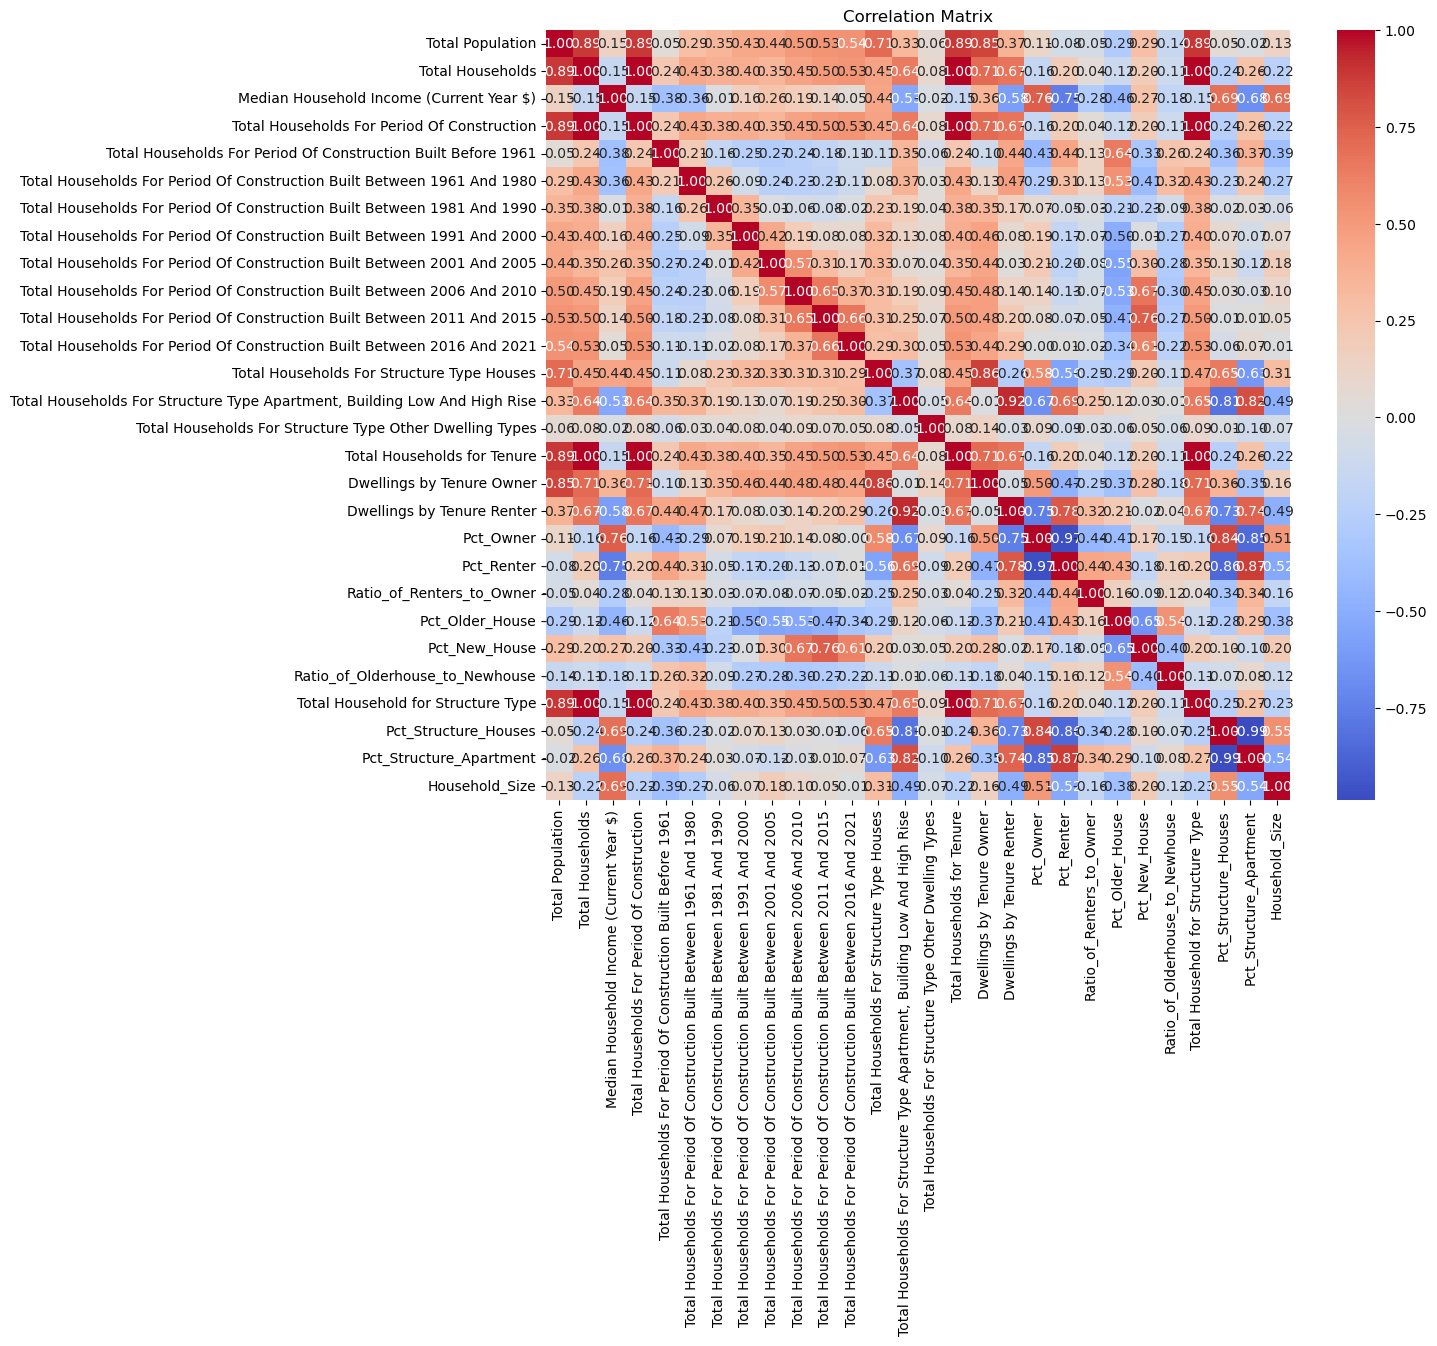

In [15]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

new_variables Correlation

In [16]:
new_variables = [
    'Total Population',
    'Total Households',
    'Median Household Income (Current Year $)',
    'Dwellings by Tenure Owner',
    'Dwellings by Tenure Renter',
    'Total Households For Structure Type Houses',
    'Total Households For Structure Type Apartment, Building Low And High Rise',
    'Pct_Owner',
    'Pct_Renter',
    'Ratio_of_Renters_to_Owner',
    'Pct_Older_House',
    'Pct_New_House',
    'Ratio_of_Olderhouse_to_Newhouse',
    'Pct_Structure_Houses',
    'Pct_Structure_Apartment',
    'Household_Size',
]

In [17]:
new_data = data[new_variables]

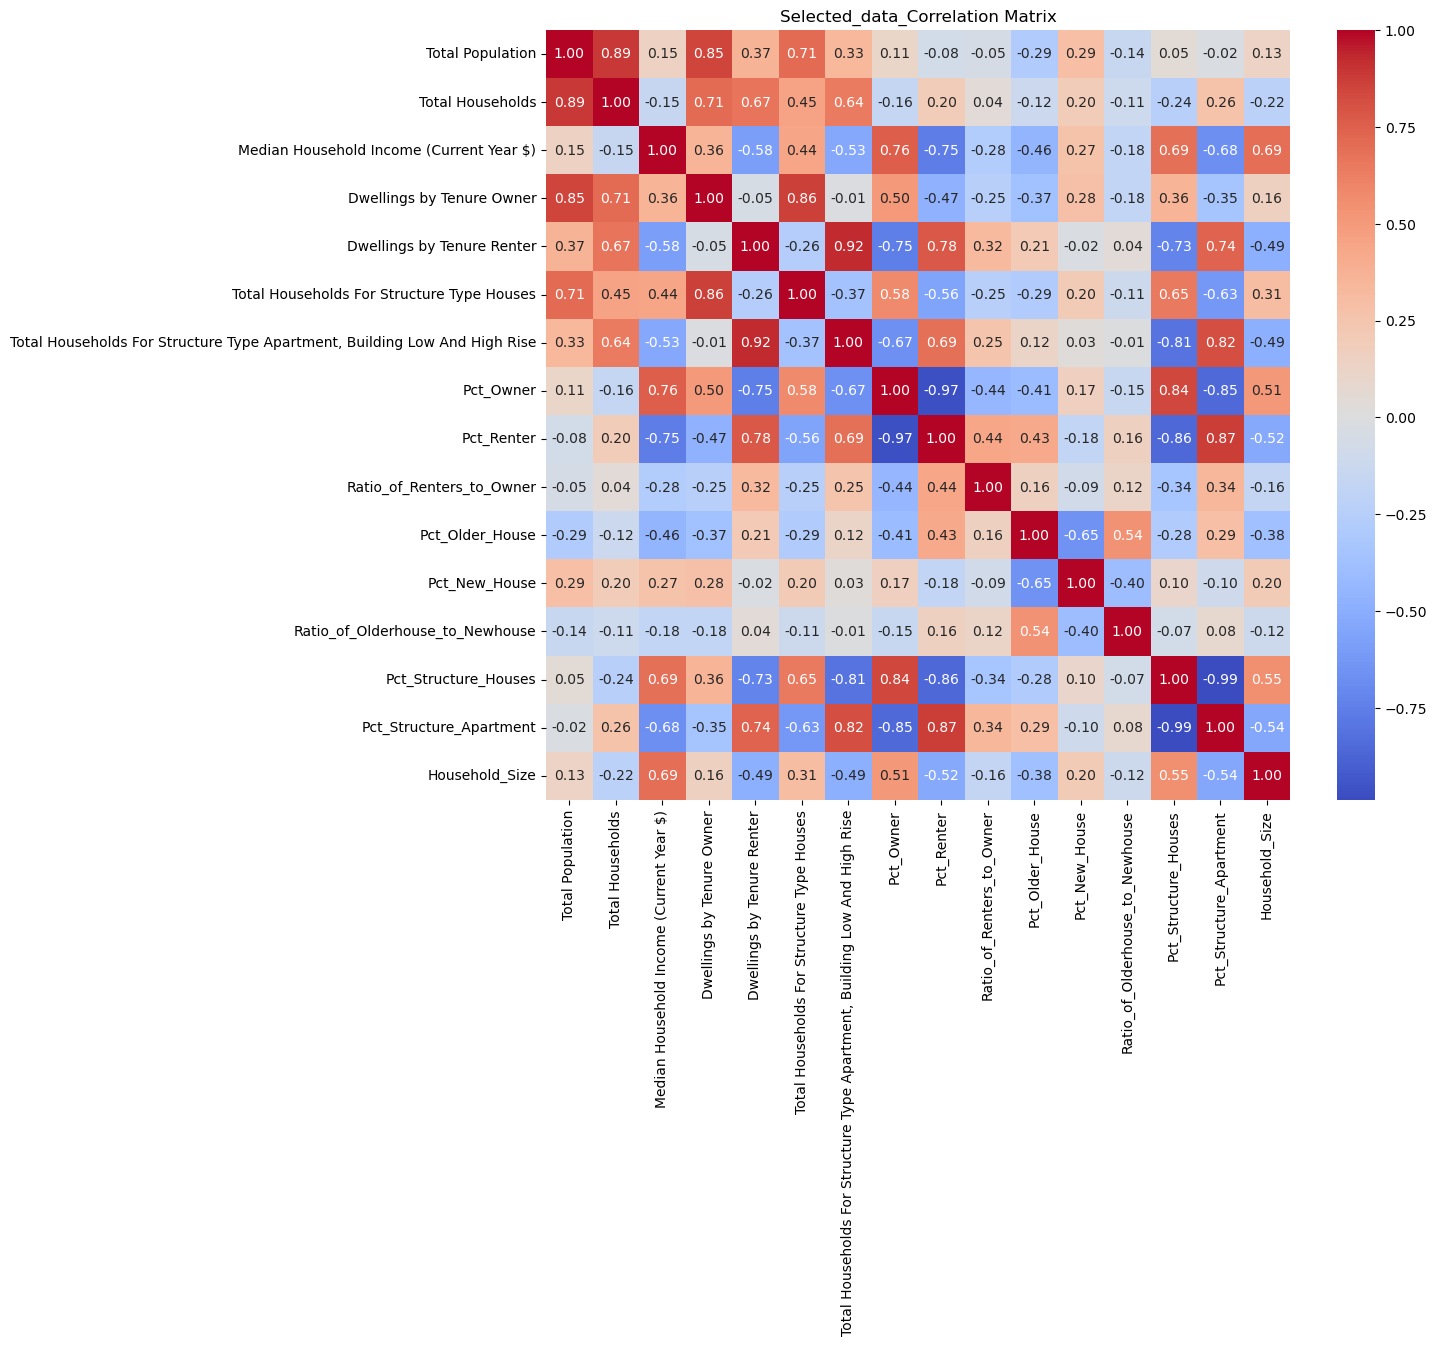

In [18]:
new_data_correlation_matrix = new_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(new_data_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Selected_data_Correlation Matrix")
plt.show()

Use decision tree to decide importance

In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

# Prepare the dataset

In [21]:
X = new_data.drop(columns=['Median Household Income (Current Year $)'])
y = new_data['Median Household Income (Current Year $)']

Drop rows where the target variable is missing

In [22]:
data_cleaned = new_data.dropna(subset=['Median Household Income (Current Year $)'])

Update predictors and target variables after cleaning

In [23]:
X = data_cleaned.drop(columns=['Median Household Income (Current Year $)'])
y = data_cleaned['Median Household Income (Current Year $)']

Fill missing values with the mean for simplicity

In [24]:
X.fillna(X.mean(), inplace=True)

Split data into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fit a decision tree regressor to assess feature importance

In [26]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Calculate feature importance

In [27]:
# Rank the importance of each feature by most influential in the decision-making process of the model.
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [28]:
feature_importances

,Feature,Importance
6,Pct_Owner,0.503135
14,Household_Size,0.201594
7,Pct_Renter,0.076199
9,Pct_Older_House,0.046577
13,Pct_Structure_Apartment,0.032705
11,Ratio_of_Olderhouse_to_Newhouse,0.026363
12,Pct_Structure_Houses,0.021485
10,Pct_New_House,0.016212
8,Ratio_of_Renters_to_Owner,0.015663
5,"Total Households For Structure Type Apartment,...",0.013726


Select the most important features using a threshold

In [29]:
# prefit = True: indicates that the model has already been trained
# so its results can be directly used without training again
selected_features_model = SelectFromModel(decision_tree, prefit=True) 
selected_features = X.columns[selected_features_model.get_support()]

In [30]:
selected_features

Index(['Pct_Owner', 'Pct_Renter', 'Household_Size'], dtype='object')

Determine the cumulative importance threshold (e.g., 90% of total importance)

In [31]:
cumulative_importance = feature_importances['Importance'].cumsum()
threshold_index = (cumulative_importance <= 0.9).sum()

Select features contributing to 90% of importance

In [32]:
selected_features = feature_importances.iloc[:threshold_index]['Feature']
selected_features

6                           Pct_Owner
14                     Household_Size
7                          Pct_Renter
9                     Pct_Older_House
13            Pct_Structure_Apartment
11    Ratio_of_Olderhouse_to_Newhouse
Name: Feature, dtype: object

Convert selected features to a list to display full names

In [33]:
selected_features_full = selected_features.tolist()
print("Selected Features:", selected_features_full)

Selected Features: ['Pct_Owner', 'Household_Size', 'Pct_Renter', 'Pct_Older_House', 'Pct_Structure_Apartment', 'Ratio_of_Olderhouse_to_Newhouse']


Evaluate the model using selected features

In [34]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Fit the decision tree on the selected features

In [35]:
decision_tree_selected = DecisionTreeRegressor(random_state=42)
decision_tree_selected.fit(X_train_selected, y_train)

DecisionTreeRegressor(random_state=42)

Predict and calculate RMSE

In [36]:
y_pred = decision_tree_selected.predict(X_test_selected)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse

15236.005306097151

Scatter plot: Total Population vs Median Household Income

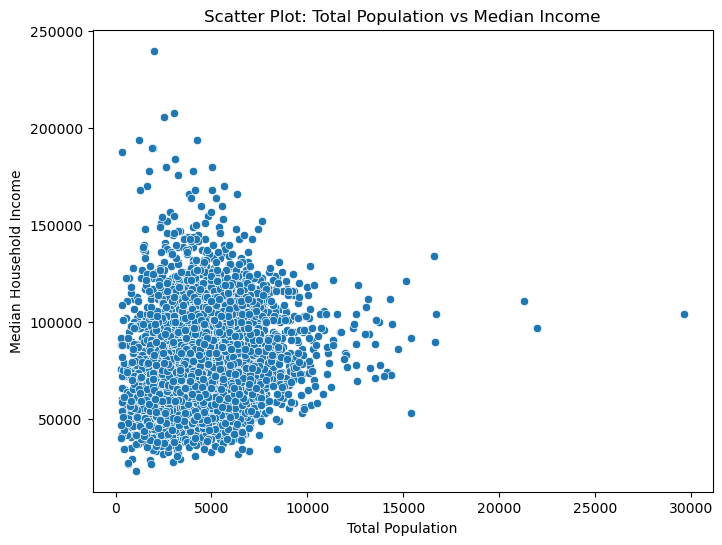

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Total Population', y='Median Household Income (Current Year $)')
plt.title("Scatter Plot: Total Population vs Median Income")
plt.xlabel("Total Population")
plt.ylabel("Median Household Income")
plt.show()

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot scatterplots for selected features against Median Household Income

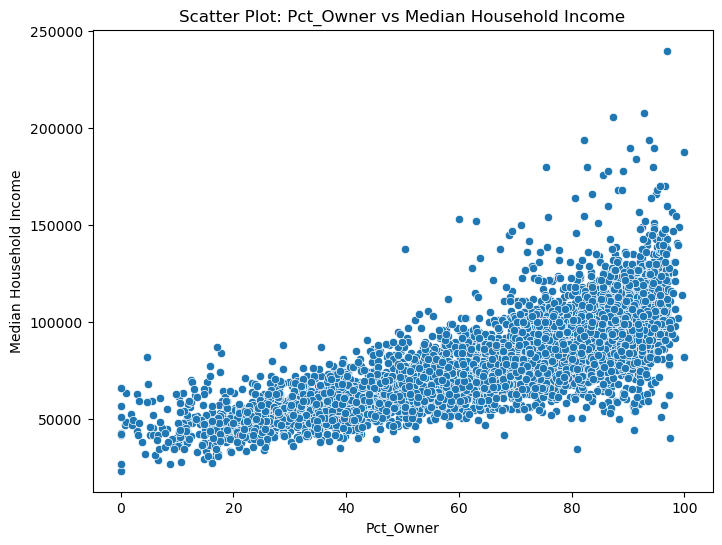

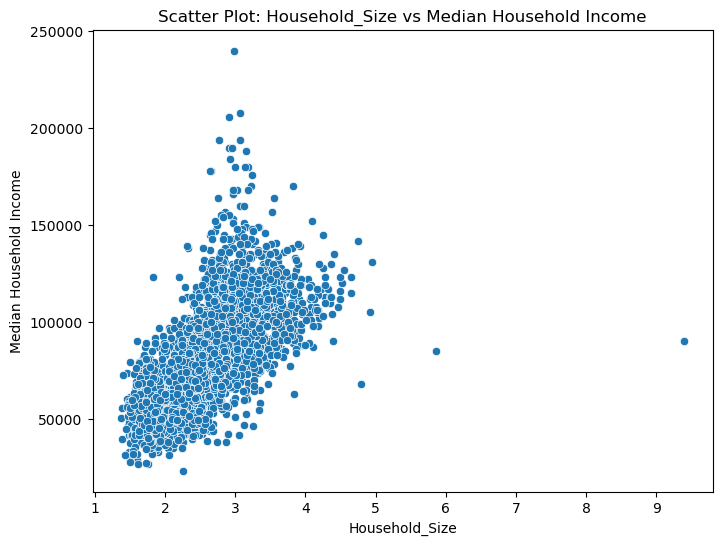

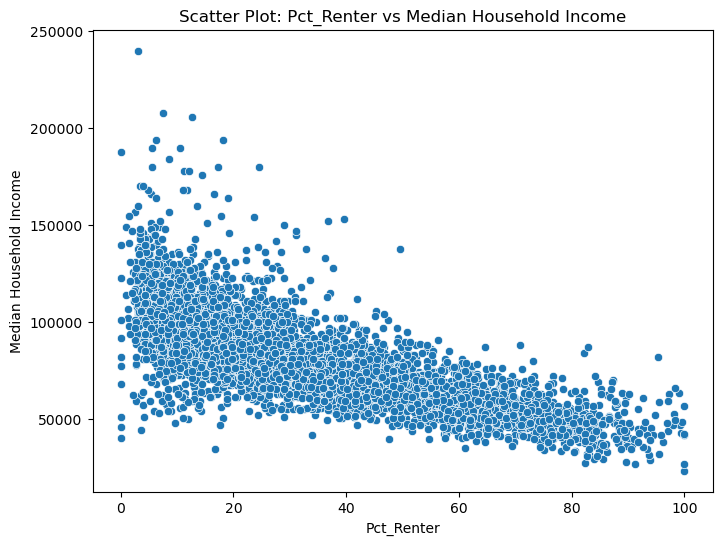

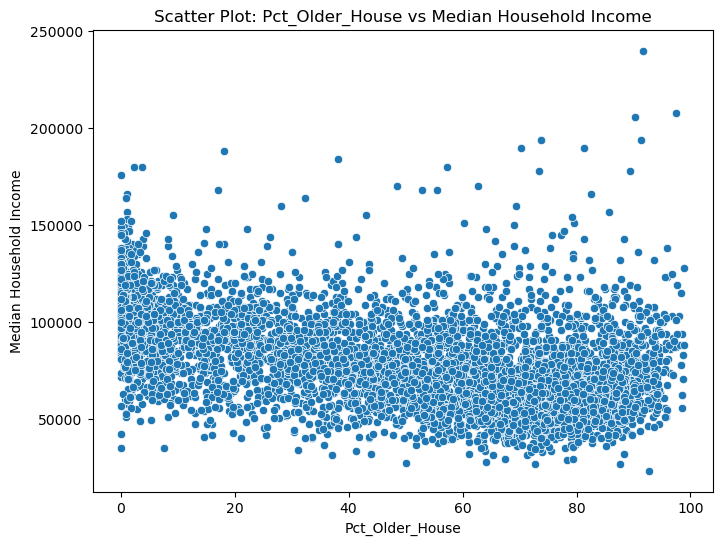

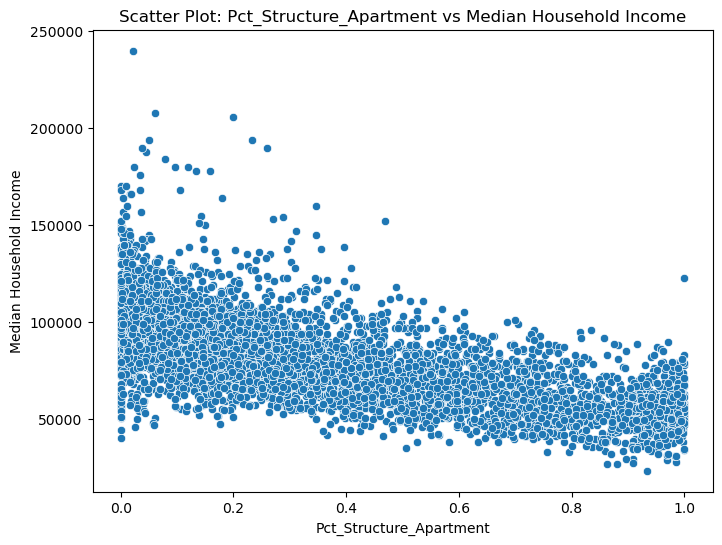

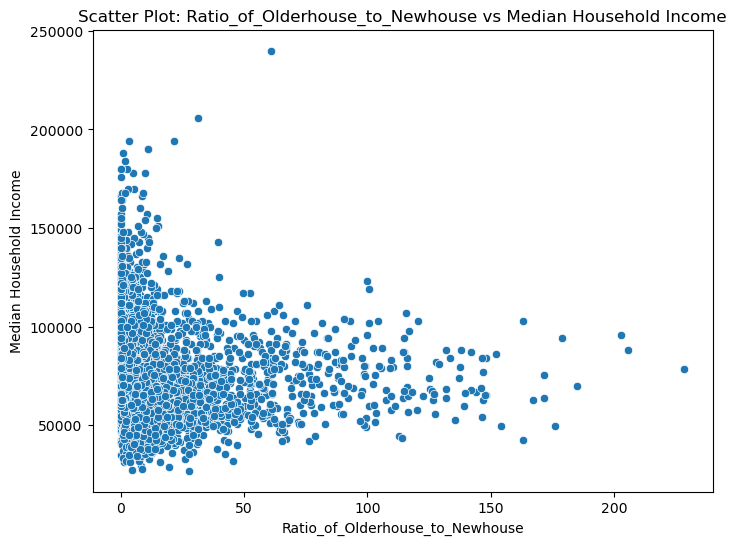

In [39]:
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_cleaned, x=feature, y='Median Household Income (Current Year $)')
    plt.title(f"Scatter Plot: {feature} vs Median Household Income")
    plt.xlabel(feature)
    plt.ylabel("Median Household Income")
    plt.show()

# Clustering Analysis

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

In [42]:
k_values = range(1, 11)
inertias = []

Compute KMeans for each k and calculate inertia

In [43]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)  
    inertias.append(kmeans.inertia_) 

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

1. The inertia value (sum of squared distances of samples to their nearest cluster center) to the inertias list.

In [44]:
diffs = np.diff(inertias)
second_diffs = np.diff(diffs)
optimal_k = np.argmax(second_diffs) + 2 # Add 2 because the second diff starts from k=3

Finds the index of the largest value in the second derivative array.

Print the optimal k

In [45]:
print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 2


Plot the elbow method graph

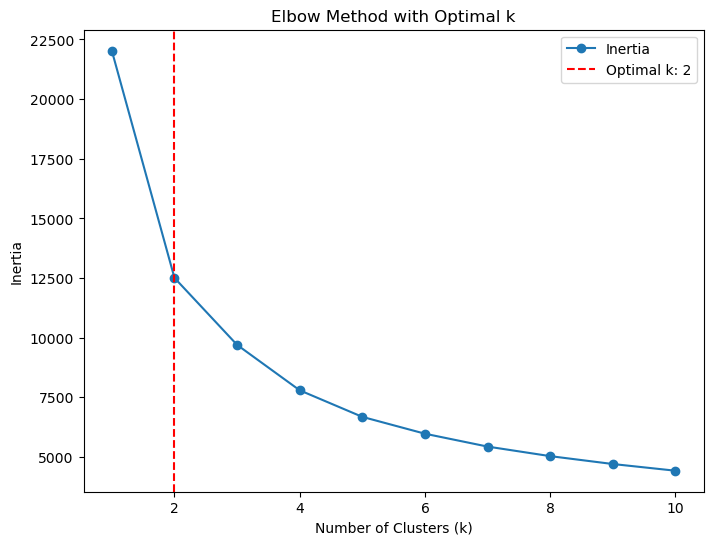

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', label="Inertia")
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f"Optimal k: {optimal_k}")
plt.title("Elbow Method with Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.show()

Part 1 d)

In [47]:
optimal_k = 2 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_train_selected['Cluster'] = kmeans.fit_predict(X_train_scaled)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_53/2276329283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['Cluster'] = kmeans.fit_predict(X_train_scaled)


In [48]:
data_cleaned.loc[X_train_selected.index, 'Cluster'] = X_train_selected['Cluster']
cluster_stats = data_cleaned.groupby('Cluster')[selected_features].agg(['mean', 'std', 'size']).reset_index()
cluster_stats

/tmp/ipykernel_53/3522538868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[X_train_selected.index, 'Cluster'] = X_train_selected['Cluster']


Cluster  Pct_Owner                  Household_Size                  \
                mean        std  size           mean       std  size   
0     0.0  80.906396  10.404767  2270       2.806143  0.458100  2270   
1     1.0  42.203126  15.937300  1401       2.167244  0.345285  1401   

  Pct_Renter                  Pct_Older_House                   \
        mean        std  size            mean        std  size   
0  18.821251   9.901744  2270       37.685505  29.347423  2270   
1  57.758393  15.927762  1401       64.054217  22.112678  1401   

  Pct_Structure_Apartment                 Ratio_of_Olderhouse_to_Newhouse  \
                     mean       std  size                            mean   
0                0.172698  0.159292  2270                        8.409320   
1                0.681332  0.230264  1401                       18.508364   

                    
         std  size  
0  18.389538  2270  
1  27.231846  1401

Cross Check

In [49]:
cluster_sizes = X_train_selected['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
Cluster
0    2270
1    1401
Name: count, dtype: int64


In [50]:
cluster_profiles = X_train_selected.groupby('Cluster').mean()
cluster_profiles.to_csv("Cluster_Profiles.csv", index=True)

In [51]:
print(cluster_profiles)

         Pct_Owner  Household_Size  Pct_Renter  Pct_Older_House  \
Cluster                                                           
0        80.906396        2.806143   18.821251        37.685505   
1        42.203126        2.167244   57.758393        64.054217   

         Pct_Structure_Apartment  Ratio_of_Olderhouse_to_Newhouse  
Cluster                                                            
0                       0.172698                         8.619061  
1                       0.681332                        18.314769  


In [52]:
import matplotlib.patches as mpatches

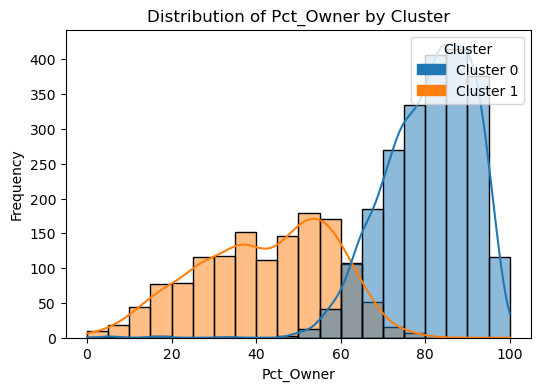

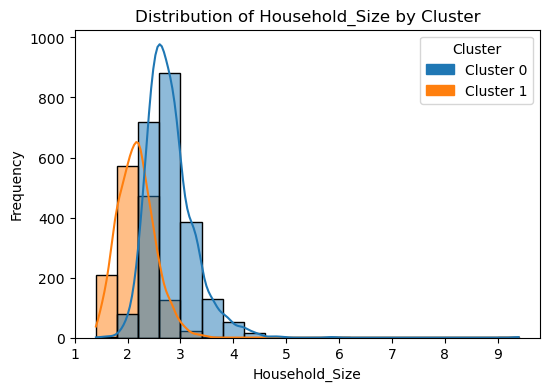

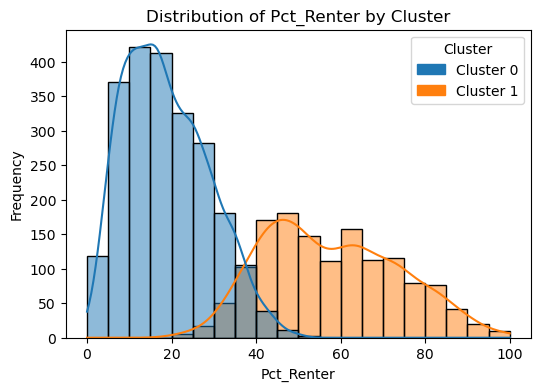

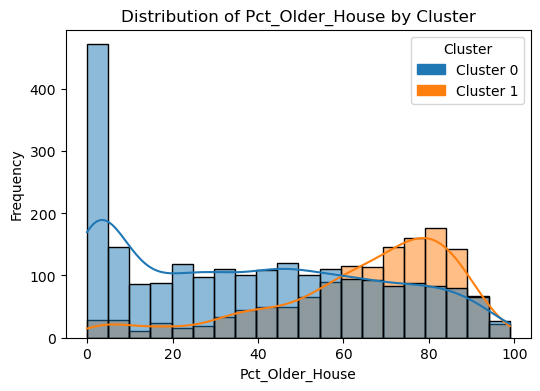

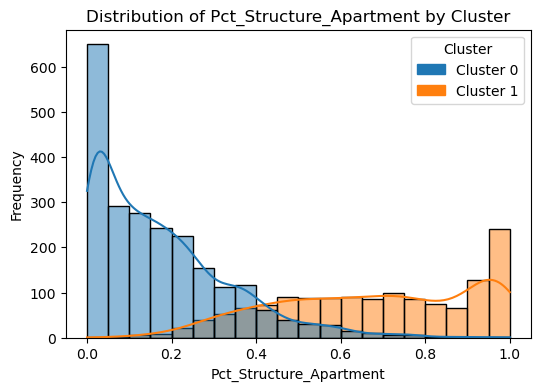

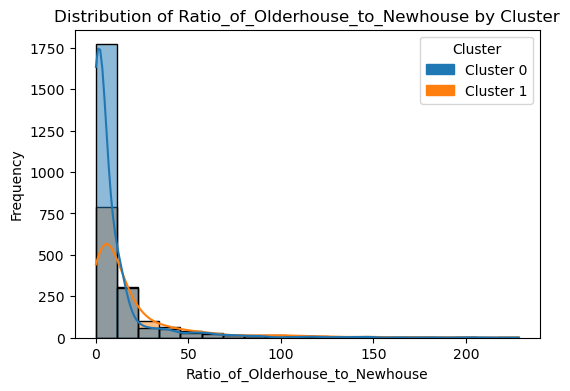

In [53]:
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=X_train_selected, x=feature, hue='Cluster', kde=True, bins=20, palette="tab10")
    plt.title(f"Distribution of {feature} by Cluster")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    cluster_labels = [f"Cluster {i}" for i in range(X_train_selected['Cluster'].nunique())] 
    colors = sns.color_palette("tab10", len(cluster_labels)) 
    legend_patches = [mpatches.Patch(color=colors[i], label=cluster_labels[i]) for i in range(len(cluster_labels))]
    plt.legend(handles=legend_patches, title="Cluster", loc="upper right")
    plt.show()

/tmp/ipykernel_53/576398792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=X_train_selected['Cluster'], y=feature, palette="tab10")


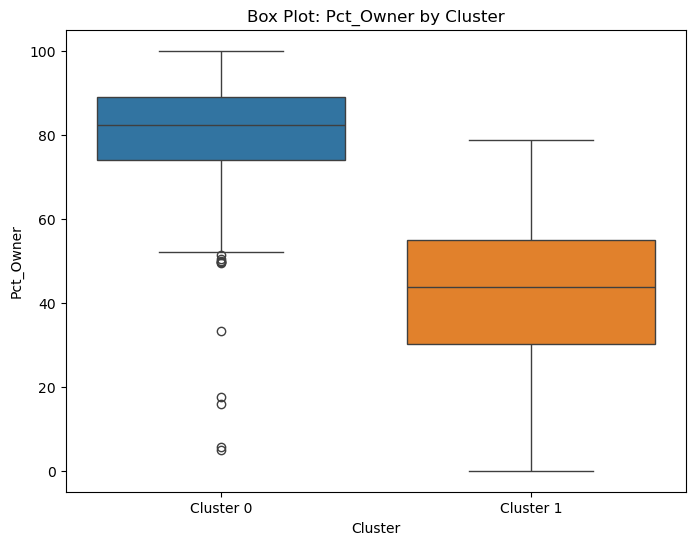

/tmp/ipykernel_53/576398792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=X_train_selected['Cluster'], y=feature, palette="tab10")


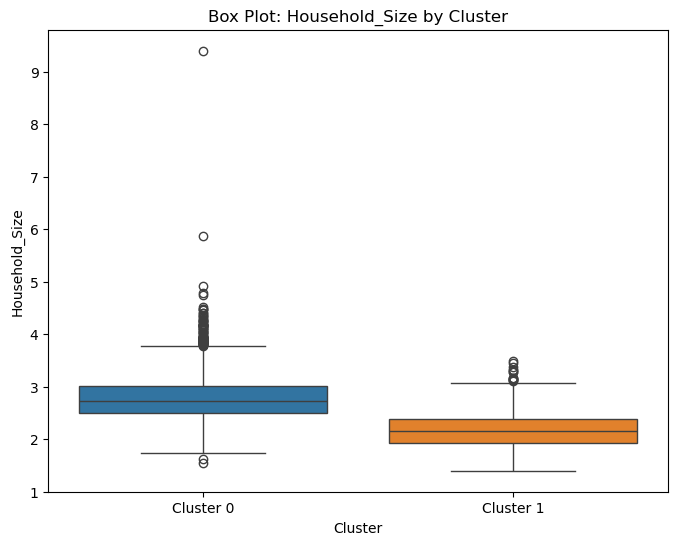

/tmp/ipykernel_53/576398792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=X_train_selected['Cluster'], y=feature, palette="tab10")


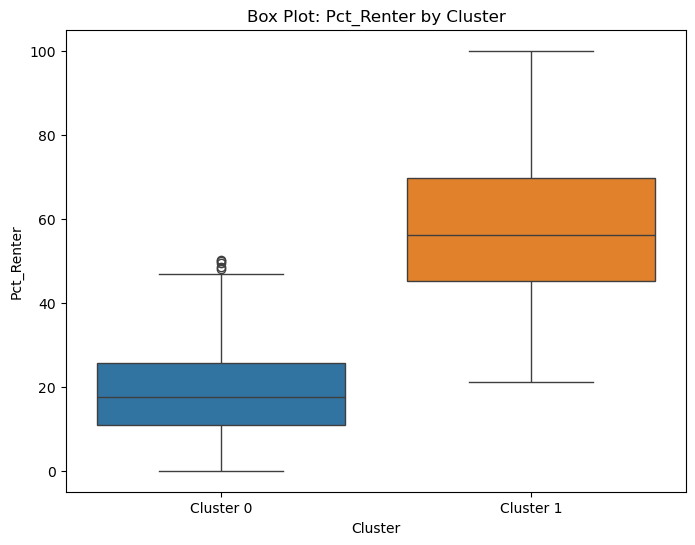

/tmp/ipykernel_53/576398792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=X_train_selected['Cluster'], y=feature, palette="tab10")


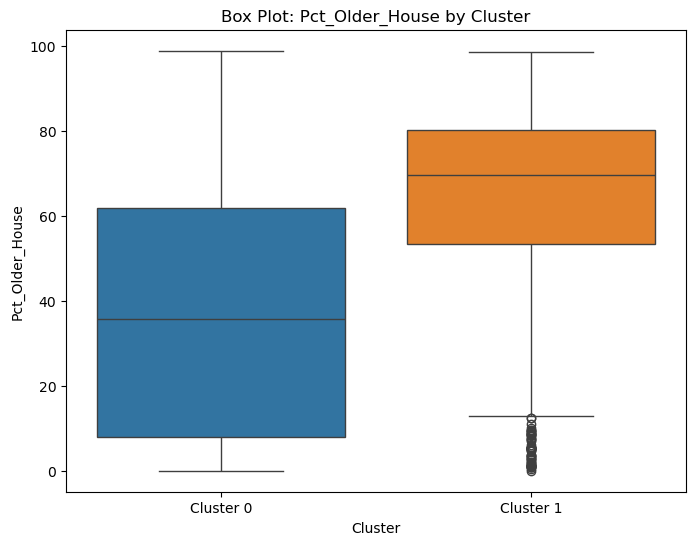

/tmp/ipykernel_53/576398792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=X_train_selected['Cluster'], y=feature, palette="tab10")


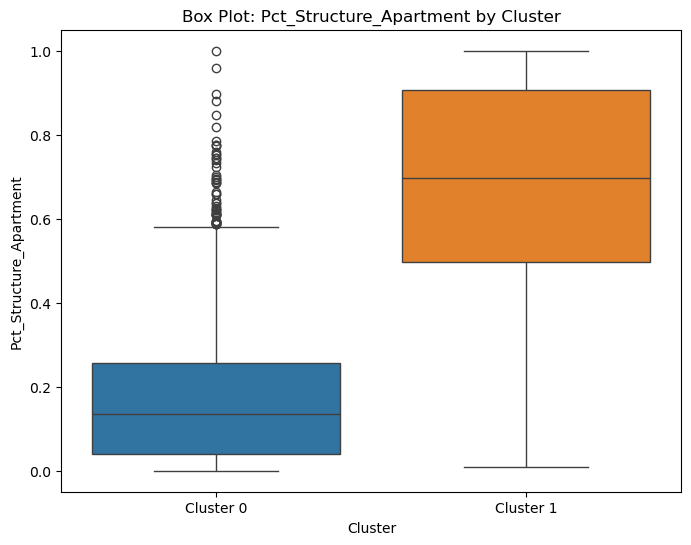

/tmp/ipykernel_53/576398792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=X_train_selected['Cluster'], y=feature, palette="tab10")


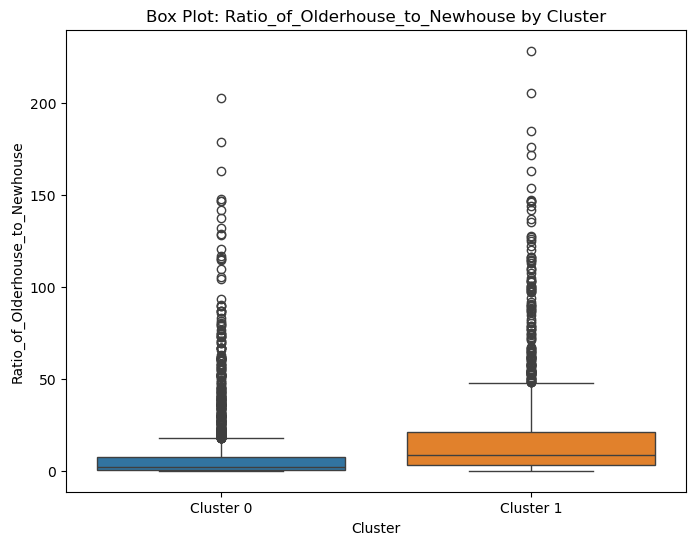

In [54]:
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_cleaned, x=X_train_selected['Cluster'], y=feature, palette="tab10")
    plt.title(f"Box Plot: {feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    cluster_labels = [f"Cluster {i}" for i in range(X_train_selected['Cluster'].nunique())] 
    plt.xticks(ticks=range(len(cluster_labels)), labels=cluster_labels)
    plt.show()

Part 1 e)

In [55]:
from sklearn.cluster import Birch
from sklearn.metrics import adjusted_rand_score

In [56]:
# Train the BIRCH model
birch_model = Birch(n_clusters=2)
X_train_selected['BIRCH_Cluster'] = birch_model.fit_predict(X_train_scaled)

/tmp/ipykernel_53/1068958954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['BIRCH_Cluster'] = birch_model.fit_predict(X_train_scaled)


In [57]:
data_cleaned.loc[X_train_selected.index, 'BIRCH_Cluster'] = X_train_selected['BIRCH_Cluster']
birch_cluster_stats = data_cleaned.groupby('BIRCH_Cluster')[selected_features].agg(['mean', 'std', 'size']).reset_index()
birch_cluster_stats

/tmp/ipykernel_53/4029968524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[X_train_selected.index, 'BIRCH_Cluster'] = X_train_selected['BIRCH_Cluster']


BIRCH_Cluster  Pct_Owner                  Household_Size                  \
                      mean        std  size           mean       std  size   
0           0.0  66.104337  22.874005  3607       2.563275  0.524232  3607   
1           1.0  67.902416  13.803310    64       2.508157  0.295687    64   

  Pct_Renter                  Pct_Older_House                   \
        mean        std  size            mean        std  size   
0  33.709110  22.826787  3607       47.077461  29.510516  3607   
1  32.109187  13.775577    64       85.588321  10.927688    64   

  Pct_Structure_Apartment                 Ratio_of_Olderhouse_to_Newhouse  \
                     mean       std  size                            mean   
0                0.367736  0.312686  3607                       10.185594   
1                0.314808  0.224826    64                      127.010417   

                    
         std  size  
0  16.149006  3607  
1  31.344784    64

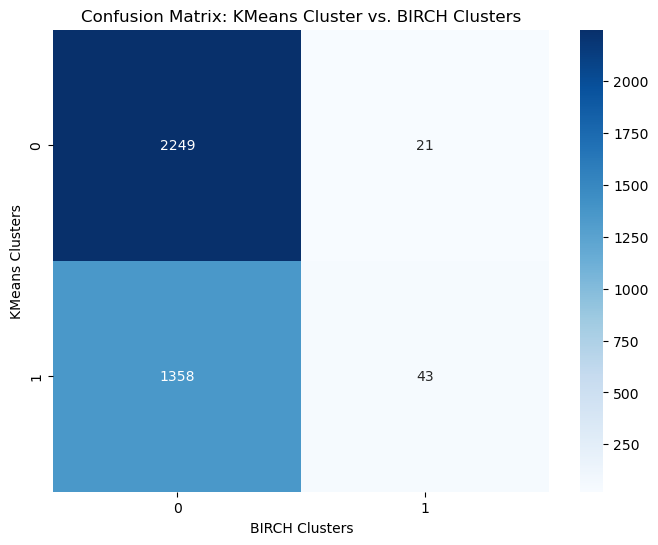

In [58]:
conf_matrix = pd.crosstab(X_train_selected['Cluster'], X_train_selected['BIRCH_Cluster'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: KMeans Cluster vs. BIRCH Clusters")
plt.xlabel("BIRCH Clusters")
plt.ylabel("KMeans Clusters")
plt.show()

In [59]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

birch_k_values = range(2, 11)
birch_silhouette_scores = []  


for k in birch_k_values:
    birch = Birch(n_clusters=k)
    birch.fit(X_train_scaled)
    
    birch_labels = birch.labels_ 
    silhouette_avg = silhouette_score(X_train_scaled, birch_labels)
    birch_silhouette_scores.append(silhouette_avg)


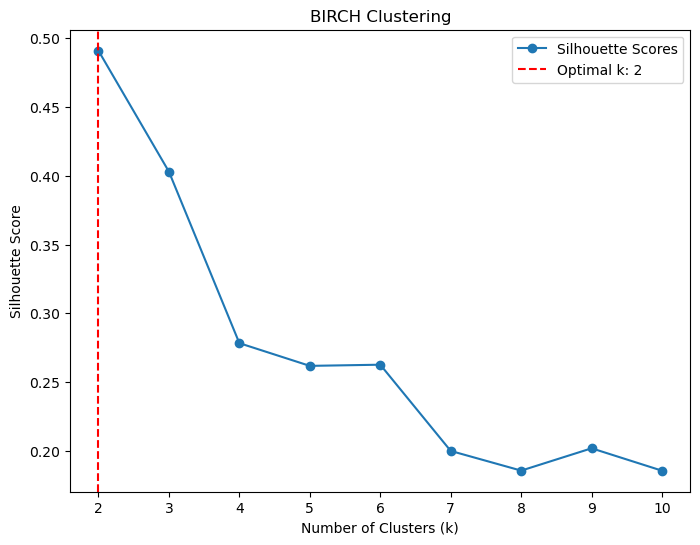

In [60]:
# Find the optimal k 
birch_optimal_k = birch_k_values[birch_silhouette_scores.index(max(birch_silhouette_scores))]

plt.figure(figsize=(8, 6))
plt.plot(list(birch_k_values), birch_silhouette_scores, marker='o', label='Silhouette Scores')  # Fix: Use full scores list
plt.axvline(x=birch_optimal_k, color='red', linestyle='--', label=f"Optimal k: {birch_optimal_k}")
plt.title('BIRCH Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [61]:
print(f"Optimal number of clusters (k): {birch_optimal_k}")

Optimal number of clusters (k): 2


In [62]:
birch_optimal_k = 2 
birch = Birch(n_clusters=birch_optimal_k)
X_train_selected['Birch_Cluster'] = birch.fit_predict(X_train_scaled)

/tmp/ipykernel_53/1625952244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['Birch_Cluster'] = birch.fit_predict(X_train_scaled)


In [63]:
data_cleaned.loc[X_train_selected.index, 'Birch_Cluster'] = X_train_selected['Birch_Cluster']
birch_cluster_stats = data_cleaned.groupby('Birch_Cluster')[selected_features].agg(['mean', 'std', 'size']).reset_index()
birch_cluster_stats

/tmp/ipykernel_53/1626583065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[X_train_selected.index, 'Birch_Cluster'] = X_train_selected['Birch_Cluster']


Birch_Cluster  Pct_Owner                  Household_Size                  \
                      mean        std  size           mean       std  size   
0           0.0  66.104337  22.874005  3607       2.563275  0.524232  3607   
1           1.0  67.902416  13.803310    64       2.508157  0.295687    64   

  Pct_Renter                  Pct_Older_House                   \
        mean        std  size            mean        std  size   
0  33.709110  22.826787  3607       47.077461  29.510516  3607   
1  32.109187  13.775577    64       85.588321  10.927688    64   

  Pct_Structure_Apartment                 Ratio_of_Olderhouse_to_Newhouse  \
                     mean       std  size                            mean   
0                0.367736  0.312686  3607                       10.185594   
1                0.314808  0.224826    64                      127.010417   

                    
         std  size  
0  16.149006  3607  
1  31.344784    64

In [64]:
birch_cluster_sizes = X_train_selected['Birch_Cluster'].value_counts()
print("Birch Cluster Sizes:")
print(birch_cluster_sizes)

Birch Cluster Sizes:
Birch_Cluster
0    3607
1      64
Name: count, dtype: int64


In [65]:
from sklearn.cluster import KMeans

# Optimal k = 2
best_kmeans = KMeans(n_clusters=2, random_state=42)
best_kmeans.fit(X_train_scaled)

best_kmeans_labels = best_kmeans.labels_
print(best_kmeans_labels)


[1 0 0 ... 0 0 1]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [66]:
best_kmeans

KMeans(n_clusters=2, random_state=42)

In [67]:
from sklearn.cluster import Birch

# Create BIRCH model with 2 clusters by using the same k with K means
best_birch = Birch(n_clusters=2)
best_birch.fit(X_train_scaled)

best_birch_labels = best_birch.labels_
print(best_birch_labels)

[0 0 0 ... 0 0 0]


/tmp/ipykernel_53/4191122853.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=colors, cmap='viridis', alpha=0.7, edgecolor='k')
/tmp/ipykernel_53/4191122853.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=colors, cmap='plasma', alpha=0.7, edgecolor='k')


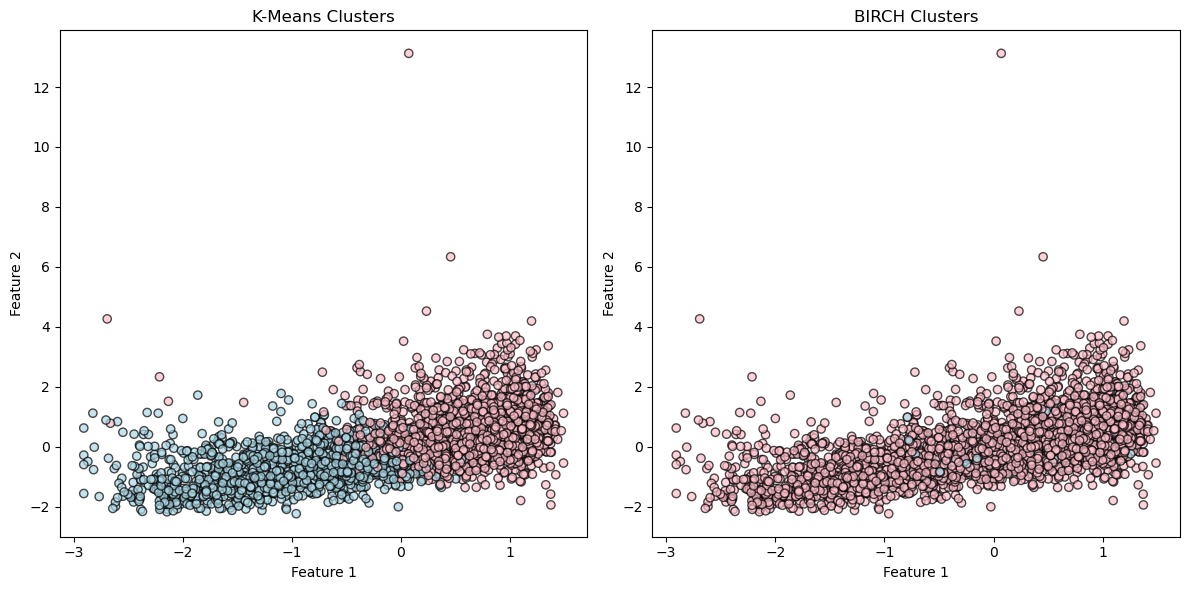

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Make different colors for different clusters, so it can better visualize
colors = ['pink' if label == 0 else 'lightblue' for label in best_kmeans_labels]

# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=colors, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("K-Means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


# Make different colors for different clusters, so it can better visualize
colors = ['pink' if label == 0 else 'lightblue' for label in best_birch_labels]

# Plot BIRCH clusters
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=colors, cmap='plasma', alpha=0.7, edgecolor='k')
plt.title("BIRCH Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()


From the plot, we can see Kmeans has explicit clusters, so we choose to use Kmeans methods

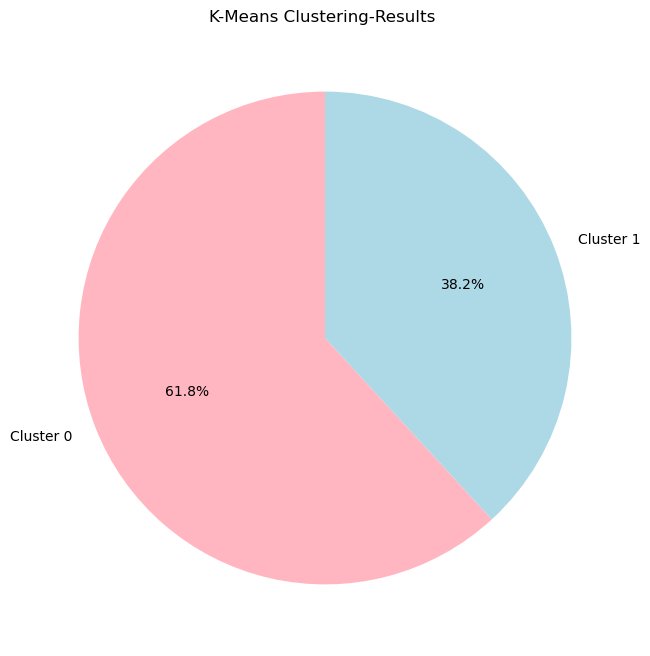

In [69]:
best_kmeans_labels, number = np.unique(best_kmeans_labels, return_counts=True)
plt.figure(figsize=(8, 8))
plt.pie(
    number, 
    labels=[f"Cluster {label}" for label in best_kmeans_labels], 
    autopct='%1.1f%%', # One decimal place
    startangle=90, 
    colors=['lightpink','lightblue']
)
plt.title("K-Means Clustering-Results ")
plt.show()

# Part II

Install packages

In [70]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Step 1: Check for missing values

In [71]:
print("Checking for missing values in X_train and y_train...")
print(X_train.isnull().sum())  # Check for NaNs in X_train
print(pd.Series(y_train).isnull().sum())  # Check for NaNs in y_train

Checking for missing values in X_train and y_train...
Total Population                                                             0
Total Households                                                             0
Dwellings by Tenure Owner                                                    0
Dwellings by Tenure Renter                                                   0
Total Households For Structure Type Houses                                   0
Total Households For Structure Type Apartment, Building Low And High Rise    0
Pct_Owner                                                                    0
Pct_Renter                                                                   0
Ratio_of_Renters_to_Owner                                                    0
Pct_Older_House                                                              0
Pct_New_House                                                                0
Ratio_of_Olderhouse_to_Newhouse                                              

Step 2: Handle missing values if any

In [72]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)  # Fill missing values in X_train
y_train = np.nan_to_num(y_train)  # Replace NaNs in y_train with 0 or a constant

In [73]:
print("Shape of X_train:", X_train.shape)  # (rows, columns)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (3671, 15)
Shape of X_test: (1574, 15)


Step 3: Confirm data types and shapes

In [74]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test_selected types:", pd.DataFrame(X_train).dtypes)

X_train shape: (3671, 15)
y_train shape: (3671,)
X_test_selected types: 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object


In [75]:
print("X_train_selected columns:", X_train_selected.columns)
print("X_test_selected columns:", X_test_selected.columns)

X_train_selected columns: Index(['Pct_Owner', 'Household_Size', 'Pct_Renter', 'Pct_Older_House',
       'Pct_Structure_Apartment', 'Ratio_of_Olderhouse_to_Newhouse', 'Cluster',
       'BIRCH_Cluster', 'Birch_Cluster'],
      dtype='object')
X_test_selected columns: Index(['Pct_Owner', 'Household_Size', 'Pct_Renter', 'Pct_Older_House',
       'Pct_Structure_Apartment', 'Ratio_of_Olderhouse_to_Newhouse'],
      dtype='object')


In [76]:
# Remove clustering columns from X_train_selected that we added previous
columns_to_drop = ['BIRCH_Cluster', 'Birch_Cluster', 'Cluster']
X_train_selected = X_train_selected.drop(columns=columns_to_drop, errors='ignore')

Step 4: Train models

In [77]:
# Segment training and test data by cluster
cluster_labels_train = best_kmeans.labels_
cluster_labels_test = best_kmeans.predict(X_test_selected)

train_clusters = {}
test_clusters = {}

for cluster_label in np.unique(cluster_labels_train):
    train_clusters[cluster_label] = {
        "X": X_train_selected[cluster_labels_train == cluster_label],
        "y": y_train[cluster_labels_train == cluster_label]
    }
    test_clusters[cluster_label] = {
        "X": X_test_selected[cluster_labels_test == cluster_label],
        "y": y_test[cluster_labels_test == cluster_label] if y_test is not None else None
    }



/opt/conda/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [79]:
cluster_models = {}
cluster_metrics = {}

# Train models for each cluster
for cluster_label, data in train_clusters.items():
    print(f"Building models for Cluster {cluster_label}...")
    X_train_cluster = data["X"]
    y_train_cluster = data["y"]
    
    X_test_cluster = test_clusters[cluster_label]["X"]
    y_test_cluster = test_clusters[cluster_label]["y"]
    


Building models for Cluster 0...
Building models for Cluster 1...


In [87]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Fit models
rf_model.fit(X_train_cluster, y_train_cluster)
dt_model.fit(X_train_cluster, y_train_cluster)

# Predict on test data
rf_predictions = rf_model.predict(X_test_cluster)
dt_predictions = dt_model.predict(X_test_cluster)

# Evaluate models
rf_rmse = np.sqrt(mean_squared_error(y_test_cluster, rf_predictions))
dt_rmse = np.sqrt(mean_squared_error(y_test_cluster, dt_predictions))

rf_mae = mean_absolute_error(y_test_cluster, rf_predictions)
dt_mae = mean_absolute_error(y_test_cluster, dt_predictions)

cluster_models[cluster_label] = {
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
}

cluster_metrics[cluster_label] = {
    "Random Forest": {"RMSE": rf_rmse, "MAE": rf_mae},
    "Decision Tree": {"RMSE": dt_rmse, "MAE": dt_mae},
}

for cluster_label, metrics in cluster_metrics.items():
    print(f"\nMetrics for Cluster {cluster_label}:")
    metrics_df = pd.DataFrame(metrics).T
    print(metrics_df)
    metrics_df.to_csv(f"Cluster_{cluster_label}_Metrics.csv")



Metrics for Cluster 1:
                       RMSE           MAE
Random Forest   9185.420329   6992.703329
Decision Tree  13601.824280  10193.487699


We can see that Ranfom forest has lower MSE in both clusters

In [77]:
import pickle

# Save the trained KMeans model
with open('best_kmeans.pkl', 'wb') as f:
    pickle.dump(best_kmeans, f)


with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

In [78]:
from sklearn.preprocessing import StandardScaler

test_data = pd.read_csv('CensusCanada2021Test.csv')

with open('best_kmeans.pkl', 'rb') as f:
    best_kmeans = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

with open('dt_model.pkl', 'rb') as f:
    dt_model = pickle.load(f)

selected_features = ['Pct_Owner', 'Household_Size', 'Pct_Renter', 'Pct_Older_House','Pct_Structure_Apartment', 'Ratio_of_Olderhouse_to_Newhouse']



In [79]:
test_data['Pct_Owner'] = (test_data['Dwellings by Tenure Owner'] / test_data['Total Households for Tenure']) * 100 
test_data['Pct_Renter'] = (test_data['Dwellings by Tenure Renter'] / test_data['Total Households for Tenure']) * 100
test_data['Ratio_of_Renters_to_Owner'] = (test_data['Pct_Renter'] / test_data['Pct_Owner'])
test_data['Pct_Older_House'] = ((test_data['Total Households For Period Of Construction Built Before 1961'] +
                                test_data['Total Households For Period Of Construction Built Between 1961 And 1980']) 
                                / test_data['Total Households For Period Of Construction']) * 100

test_data['Pct_New_House'] = ((test_data['Total Households For Period Of Construction Built Between 2006 And 2010'] +
                              test_data['Total Households For Period Of Construction Built Between 2011 And 2015'] +
                              test_data['Total Households For Period Of Construction Built Between 2016 And 2021']) 
                              / test_data['Total Households For Period Of Construction']) * 100

test_data['Ratio_of_Olderhouse_to_Newhouse'] = (test_data['Pct_Older_House'] / test_data['Pct_New_House'])
test_data['Total Household for Structure Type'] = (
    test_data['Total Households For Structure Type Houses'] +
    test_data['Total Households For Structure Type Apartment, Building Low And High Rise'] +
    test_data['Total Households For Structure Type Other Dwelling Types']
)

test_data['Pct_Structure_Houses'] = (
    test_data['Total Households For Structure Type Houses'] / 
    test_data['Total Household for Structure Type']
)

test_data['Pct_Structure_Apartment'] = (
    test_data['Total Households For Structure Type Apartment, Building Low And High Rise'] / 
    test_data['Total Household for Structure Type']
)
test_data['Household_Size'] = test_data['Total Population'] / test_data['Total Households']

test_data['Ratio_of_Renters_to_Owner'] = test_data['Ratio_of_Renters_to_Owner'].replace([np.inf, -np.inf], np.nan)
test_data['Ratio_of_Olderhouse_to_Newhouse'] = test_data['Ratio_of_Olderhouse_to_Newhouse'].replace([np.inf, -np.inf], np.nan)

test_data['Ratio_of_Renters_to_Owner'].fillna(test_data['Ratio_of_Renters_to_Owner'].mean(), inplace=True)
test_data['Ratio_of_Olderhouse_to_Newhouse'].fillna(test_data['Ratio_of_Olderhouse_to_Newhouse'].mean(), inplace=True)

test_data['Ratio_of_Renters_to_Owner'] = test_data['Ratio_of_Renters_to_Owner'].round(5)
test_data['Ratio_of_Olderhouse_to_Newhouse'] = test_data['Ratio_of_Olderhouse_to_Newhouse'].round(5)


/var/folders/bk/jnskpsbs2pz84s_dbmwls7780000gn/T/ipykernel_44156/3774098543.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Ratio_of_Renters_to_Owner'].fillna(test_data['Ratio_of_Renters_to_Owner'].mean(), inplace=True)
/var/folders/bk/jnskpsbs2pz84s_dbmwls7780000gn/T/ipykernel_44156/3774098543.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because

In [80]:
test_X = test_data[selected_features]
test_X = test_X.fillna(test_X.mean())
test_X_scaled = scaler.transform(test_X)

In [81]:
test_data['Cluster'] = best_kmeans.predict(test_X_scaled)
test_X['Cluster'] = test_data['Cluster']

In [82]:
test_X.columns

Index(['Pct_Owner', 'Household_Size', 'Pct_Renter', 'Pct_Older_House',
       'Pct_Structure_Apartment', 'Ratio_of_Olderhouse_to_Newhouse',
       'Cluster'],
      dtype='object')

In [83]:
rf_model

RandomForestRegressor(random_state=42)

In [84]:
test_X

,Pct_Owner,Household_Size,Pct_Renter,Pct_Older_House,Pct_Structure_Apartment,Ratio_of_Olderhouse_to_Newhouse,Cluster
0,18.235995,1.748033,81.764005,32.300358,0.998810,1.20982,0
1,60.968661,1.887179,38.888889,1.282051,0.948718,0.02375,0
2,54.606365,2.494472,45.393635,0.837521,0.532663,0.01062,1
3,13.740458,1.601527,86.259542,94.656489,0.854962,62.00000,0
4,40.062112,2.875776,60.248447,86.645963,0.698758,34.87500,0
...,...,...,...,...,...,...,...
850,89.189189,2.375676,9.459459,50.000000,0.216216,1.68182,1
851,49.602122,1.985676,50.132626,87.533156,0.448549,47.14286,0
852,93.564356,3.052475,6.930693,9.900990,0.000000,12.66249,1
853,87.202381,2.320238,13.095238,78.571429,0.172619,6.76923,1


In [85]:
# Step 5: Predict median income using the random forest model
predictions = rf_model.predict(test_X_scaled)

/Users/pineappleeehead/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [86]:
# Step 6: Save the predictions to a text file
output_file = 'Team17_predictions.txt'
with open(output_file, 'w') as f:
    for prediction in predictions:
        f.write(f"{prediction}\n")

output_file

'Team17_predictions.txt'